<a href="https://colab.research.google.com/github/alejandrorm98/Mute-usando-tecnicas-de-Machine-learning/blob/master/Copia_de_Noise_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
from google.colab import drive
drive.mount('/content/drive')
%cd drive/My Drive/PROYECTO-muografia/

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive
/content/drive/My Drive/PROYECTO-muografia


---
**Contenido:**

---
  > 1. Tratar el problema como dos distribuciones **independientes** _paramétricas_
  > 2. Encontrar la PDF de cada distribución y clasificar nuevas muestras.
---

## Distribuciones **independientes** _paramétricas_

In [0]:
#@title Importar (Librerías) { display-mode: "form" }
import numpy as np
import matplotlib.pyplot as plt
import scipy as sp
from scipy import stats
from IPython.display import Image

# This ensures visualizations are plotted inside the notebook
%matplotlib inline

Para tratar el problema como dos distribuciones paramétricas es necesario primero pintar el histograma para identificar posibles distribuciones conocidas.

In [0]:
# Loading the histogram
H1420 = np.loadtxt('His_14_21.dat')

# Histogram sorting
V = H1420[H1420[:,0].argsort()]

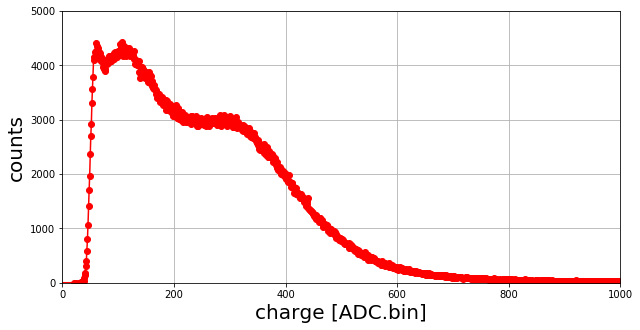

In [0]:
#@title Ejecutar (Grafica) { display-mode: "form" }
fig = plt.figure(figsize=(10, 5))
plt.plot(V[:,0],V[:,1], '-or')
plt.xlabel("charge [ADC.bin]", fontsize = 20)
plt.ylabel("counts", fontsize = 20)
plt.axis([0,1000,0,5000])
plt.grid()
plt.show()

Podemos seleccionar las dos muestras de datos para cada distribución identificada.

In [0]:
# definir los limites de cada muestra
limite1 = 40
limite2 = 180
limite3 = 250
limite4 = 600

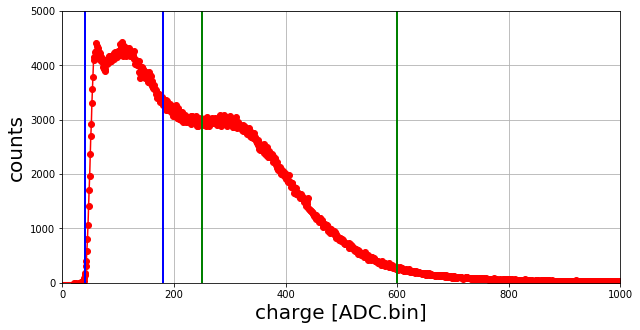

In [0]:
#@title Ejecutar (Grafica) { display-mode: "form" }

fig = plt.figure(figsize=(10, 5))
plt.plot(V[:,0],V[:,1], '-or')
plt.xlabel("charge [ADC.bin]", fontsize = 20)
plt.ylabel("counts", fontsize = 20)
plt.axis([0,1000,0,5000])
plt.axvline(x=limite1, linewidth=2, color='b')
plt.axvline(x=limite2, linewidth=2, color='b')
plt.axvline(x=limite3, linewidth=2, color='g')
plt.axvline(x=limite4, linewidth=2, color='g')
plt.grid()
plt.show()

Definir cada pdf y encontrar los parametros $\mu$ y $\sigma$ de cada muestra.

In [0]:
def gaussian_muons_pdf(x, mu, std, scale=3000):
  return scale*np.exp((-(x-mu)**2)/(2*(std**2)))

def gaussian_ep_pdf(x, mu, std, scale=4200):
  return scale*np.exp((-(x-mu)**2)/(2*(std**2)))  

In [0]:
# Ajustar los datos con la pdf definida, dar como punto inicial valores a los parámetros que son evidentes del histograma
EP_distribution = sp.optimize.curve_fit(gaussian_ep_pdf, V[limite1:limite2,0], V[limite1:limite2,1], p0=(120, 20))
# Obtener los parámetros de la distribución ajustada
mmEP = EP_distribution[0][0]
smEP = EP_distribution[0][1]
Muons_distribution = sp.optimize.curve_fit(gaussian_muons_pdf, V[limite3:limite4,0], V[limite3:limite4,1], p0=(300, 100))
mmMuons = Muons_distribution[0][0]
smMuons = Muons_distribution[0][1]

print('Muestra Muons')
print('Media=%.3f, Desviación Estándar=%.3f' % (mmMuons, smMuons))
print('Muestra E/P')
print('Media=%.3f, Desviación Estándar=%.3f' % (mmEP, smEP))

Muestra Muons
Media=270.312, Desviación Estándar=141.697
Muestra E/P
Media=99.168, Desviación Estándar=125.593


---
Documentación [curve_fit](https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.curve_fit.html)

---

Ahora se muestran las distribuciones parametrizadas.

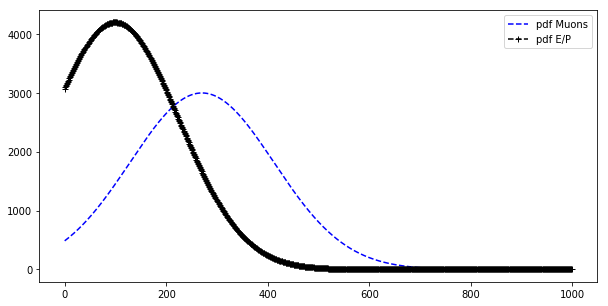

In [0]:
#@title Ejecutar (Grafica) { display-mode: "form" }
# Definir el dominio del eje x
charge = range(0,1000,1)
fig = plt.figure(figsize=(10, 5))
# Calcular la probabilidad con la pdf para cada distribución
muons = gaussian_muons_pdf(charge, mu=mmMuons, std=smMuons, scale=3000)
ep = gaussian_ep_pdf(charge, mu=mmEP, std=smEP, scale=4200)
plt.plot(charge, muons, '--b', label='pdf Muons')
plt.plot(charge, ep, '--+k', label='pdf E/P')
plt.legend();  
plt.show();

Ahora visualizar que tanto se ajustan a los datos y clasificar

In [0]:
point = 200

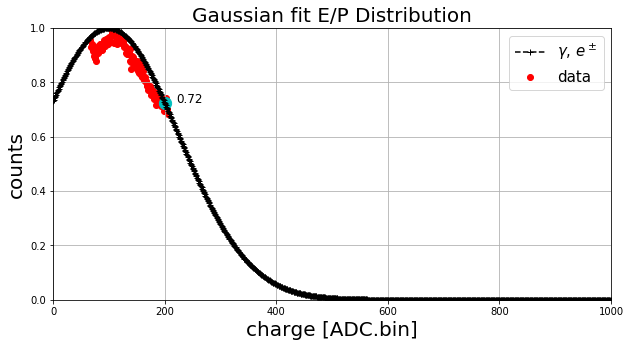

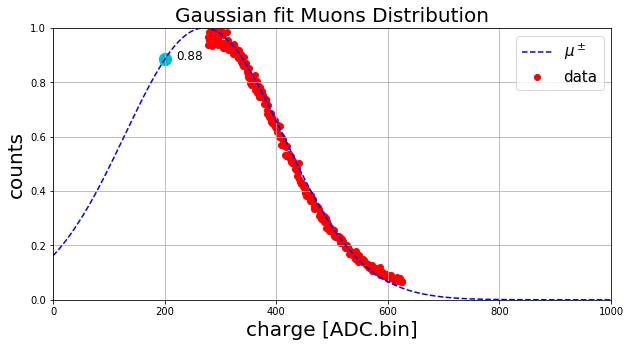

In [0]:
#@title Ejecutar (Graficas) { display-mode: "form" }

def scaling(x, minValue, maxValue):
  return (x - minValue)/(maxValue - minValue) 

fig = plt.figure(figsize=(10, 5))
# datos
plt.scatter(V[limite1:limite2,0], scaling(V[limite1:limite2,1], np.min(V[:,1]), np.max(V[:,1])), c='r')
plt.plot(charge, scaling(ep, np.min(ep), np.max(ep)), '--+k')
plt.xlabel("charge [ADC.bin]", fontsize = 20)
plt.ylabel("counts", fontsize = 20)
plt.legend(["$\gamma$, $e^\pm$","data"], fontsize = 15)
plt.title("Gaussian fit E/P Distribution", fontsize = 20)
plt.axis([0,1000,0,1])
plt.grid()
# Ejemplo de separación
ep_ejemplo = gaussian_ep_pdf(point, mu=mmEP, std=smEP, scale=4200)
prob_ep = scaling(ep_ejemplo, np.min(ep), np.max(ep))
plt.scatter(point, prob_ep, s=150, c='c')
plt.text(point+20, prob_ep, str(round(prob_ep,2)), size=12) 
plt.show()


fig = plt.figure(figsize=(10, 5))
# Datos
plt.scatter(V[limite3:limite4,0], scaling(V[limite3:limite4,1], np.min(V[limite3:,1]), np.max(V[limite3:,1])), c='r')
plt.plot(charge, scaling(muons, np.min(muons), np.max(muons)), '--b')
plt.xlabel("charge [ADC.bin]", fontsize = 20)
plt.ylabel("counts", fontsize = 20)
plt.legend(["$\mu^\pm$","data"], fontsize = 15)
plt.title("Gaussian fit Muons Distribution", fontsize = 20)
plt.axis([0,1000,0,1])
plt.grid()
# Ejemplo de separación
muons_ejemplo = gaussian_muons_pdf(point, mu=mmMuons, std=smMuons, scale=3000)
prob_muon = scaling(muons_ejemplo, np.min(muons), np.max(muons))
plt.scatter(point,prob_muon, s=150, c='c')
plt.text(point+20, prob_muon, str(round(prob_muon,2)), size=12) 
plt.show()

## Extras: Clasificadores - Gaussian NB y GMM

## Gaussian NB

In [0]:
V = H1420[H1420[:,0].argsort()]

In [0]:
from sklearn.naive_bayes import GaussianNB

In [0]:
dataEP = V[limite1:limite2,:]
dataMuones = V[limite3:limite4,:]

In [0]:
data = np.concatenate([dataEP, dataMuones])
labels = np.concatenate([np.zeros(dataEP.shape[0]), np.ones(dataMuones.shape[0])])

In [0]:
clf = GaussianNB()
clf.fit(data, labels)

GaussianNB(priors=None, var_smoothing=1e-09)

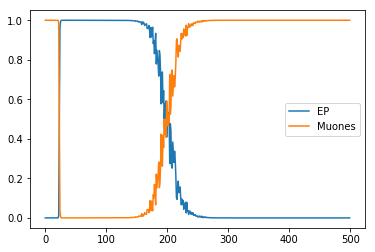

In [0]:
plt.plot(range(len(V[:500])), clf.predict_proba(V[:500])[:,0], label='EP')
plt.plot(range(len(V[:500])), clf.predict_proba(V[:500])[:,1], label='Muones')
plt.legend()
plt.show()



```
# Esto tiene formato de código
```

## Gaussian Mixture Models

In [0]:
Vstack = V[:limite4]

In [0]:
GMM = sklearn.mixture.GaussianMixture(n_components=2, 
                                      covariance_type='tied', 
                                      max_iter=1000, 
                                      means_init=np.array([[120,4000],[300,3000]]),
                                      n_init=5,
                                      weights_init=[.8,.2])

In [0]:
GMM.fit(Vstack);

In [0]:
GMM.weights_

array([0.58368292, 0.41631708])

In [0]:
GMM.means_

array([[ 224.99206007, 3238.09485531],
       [ 468.37131015,  799.86553756]])

In [0]:
GMM.covariances_

array([[ 15724.86612977, -41774.74054273],
       [-41774.74054273, 391028.32782585]])

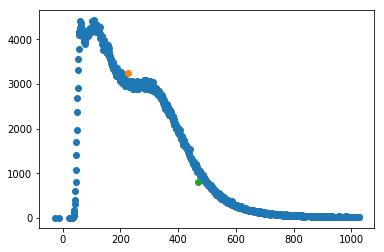

In [0]:
plt.scatter(V[:1000,0], V[:1000,1]);
plt.scatter(GMM.means_[0][0], GMM.means_[0][1])
plt.scatter(GMM.means_[1][0], GMM.means_[1][1])
plt.show()

In [0]:
from scipy.stats import multivariate_normal
p1 = multivariate_normal(mean=GMM.means_[0,:], cov=GMM.covariances_)
p2 = multivariate_normal(mean=GMM.means_[1,:], cov=GMM.covariances_)

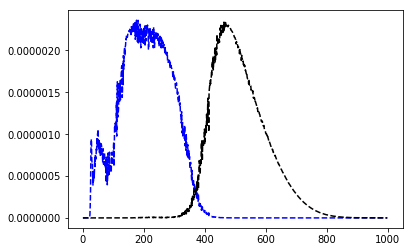

In [0]:
pdf1 = [p1.pdf(i) for i in V[:1000,:]]
pdf2 = [p2.pdf(i) for i in V[:1000,:]]
plt.plot(charge, pdf1, '--b', label='pdf Muons')
plt.plot(charge, pdf2, '--k', label='pdf Muons')
plt.show()

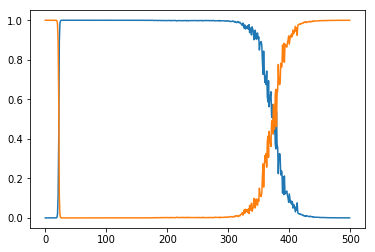

In [0]:
plt.plot(range(len(V[:500])), GMM.predict_proba(V[:500])[:,0])
plt.plot(range(len(V[:500])), GMM.predict_proba(V[:500])[:,1])
plt.show()